In [59]:
import numpy as np

def fakeSpectrum(x) :
    return x * np.exp(-0.225*x) * np.log(x) + 1

def fakeTrough(x,mu,sigma) :
    return 0.2*fakeSpectrum(mu)*np.exp(-(x-mu)**2/2/sigma)

def generateFalseData(NPoints, MSpectra, KEndmembers, noiseV=0, noiseB=0) :
    
    # create false abundances (breakup 1 into K parts)
    A = np.random.random([KEndmembers, NPoints])
    sumA = np.sum(A,axis=0)
    A = A/sumA

    # create false pure spectra
    XF = np.linspace(0.01,10.01,MSpectra)
    F = np.zeros([KEndmembers,MSpectra]) + fakeSpectrum(XF)
    centers = np.random.random([KEndmembers])*8.5 + 1
    F = F - fakeTrough((np.zeros([KEndmembers,MSpectra])+XF).T,centers,0.1).T
    
    # add random noise to I
    noise = noiseV*np.random.randn(NPoints, MSpectra) + noiseB
    I = np.dot(A.T,F) + noise
    
    # normalize spectra for I and F
    normsI = np.sum(I,axis=1)
    I = (I.T/normsI).T
    normsF = np.sum(F,axis=1)
    F = (F.T/normsF).T
    
    return XF,A,F,I,centers

In [60]:
generateFalseData(3,10,4,0.05,0)

(array([1.00000000e-02, 1.12111111e+00, 2.23222222e+00, 3.34333333e+00,
        4.45444444e+00, 5.56555556e+00, 6.67666667e+00, 7.78777778e+00,
        8.89888889e+00, 1.00100000e+01]),
 array([[0.20227656, 0.28834045, 0.33200177],
        [0.04834473, 0.10182133, 0.30044169],
        [0.3750393 , 0.33848748, 0.0124383 ],
        [0.37433941, 0.27135074, 0.35511824]]),
 array([[0.03344129, 0.03835759, 0.06169711, 0.1017124 , 0.12066792,
         0.13078068, 0.13397314, 0.13219835, 0.12712148, 0.12005004],
        [0.03383346, 0.03899471, 0.0739311 , 0.10290825, 0.12208298,
         0.13231433, 0.13554423, 0.1334954 , 0.10544691, 0.12144864],
        [0.0339204 , 0.03909491, 0.07412108, 0.1031727 , 0.12228682,
         0.10673312, 0.13586595, 0.13409232, 0.12894272, 0.12176997],
        [0.03343519, 0.03853568, 0.07306082, 0.10169687, 0.12064586,
         0.12484358, 0.12848141, 0.13217419, 0.12709827, 0.12002812]]),
 array([[0.03364183, 0.03804808, 0.07059442, 0.1040242 , 0.1242075 ,
 

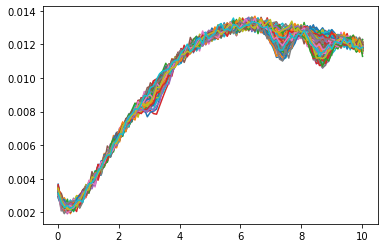

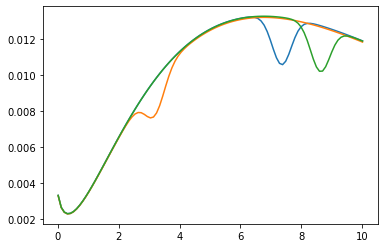

In [68]:
import matplotlib.pyplot as plt

XF, A, F, I, cents = generateFalseData(100,100,3,0.05,0)
plt.plot(XF, I.T)
plt.show()

plt.plot(XF, F.T)
plt.show()

In [58]:
np.savez('test.npz', As=A[0,:], allAs=A, Fs=F, Is=I, Xaxis=XF, centers=cents)